In [1]:
from src.BoyerMoore import BM
from src.BoyerMooreHorspool import BMH
from src.RabinKarp import RK
from src.KnuthMorrisPratt import KMP

algos = [
    BM(),
    BMH(),
    RK(),
    KMP(),
]

In [2]:
import string
from random import choice

alphabets = {
    2: string.ascii_lowercase[:2],
    4: string.ascii_lowercase[:4],
    16: string.ascii_lowercase[:16],
    32: string.ascii_lowercase[:26] + string.digits[:6],
}

pattern_sizes = [2, 4, 6, 8, 10, 12, 14]


def random_text(alphabet, n=1000):
    # Generating random text by randomly selecting symbols from the alphabet
    random_text = [choice(alphabet) for _ in range(n)]
    return "".join(random_text)

In [3]:
import pandas as pd

data = []

for algo in algos:
    for alphabet_size, alphabet in alphabets.items():
        for pattern_size in pattern_sizes:
            counters = []
            for _ in range(10):
                text = random_text(alphabet)
                pattern = text[len(text) - pattern_size :]
                algo.search(text, pattern)
                counters.append(algo.iteration_counter)

            counters_avg = sum(counters) / len(counters)
            data.append(
                [
                    type(algo).__name__,
                    alphabet_size,
                    pattern_size,
                    counters_avg,
                    counters_avg / 1000,
                ]
            )

data = pd.DataFrame(
    data, columns=["algoritmo", "tamanho do alfabeto", "tamanho do padrão", "número de iterações (média)", "esforço"]
)
data

,algoritmo,tamanho do alfabeto,tamanho do padrão,número de iterações (média),esforço
0,BM,2,2,753.1,0.7531
1,BM,2,4,698.8,0.6988
2,BM,2,6,664.8,0.6648
3,BM,2,8,617.8,0.6178
4,BM,2,10,616.0,0.6160
...,...,...,...,...,...
107,KMP,32,6,1033.4,1.0334
108,KMP,32,8,1029.2,1.0292
109,KMP,32,10,1025.5,1.0255
110,KMP,32,12,1028.6,1.0286


## Plots

In [4]:
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns


def line_plot(
    data,
    x,
    y,
    y_range,
    color=None,
    markers="o",
    title=None,
    y_tick_interval=None,
    figsize=None,
    title_sufix="",
):
    if figsize:
        plt.figure(figsize=(figsize[0], figsize[1]))

    sns.set()
    sns.lineplot(data=data, x=x, y=y, marker=markers, hue=color, palette="crest").set(
        title=title or f"{y} em função do {x} {title_sufix}", ylim=y_range
    )

    if y_tick_interval:
        # Create a list of tick positions at the specified interval
        y_ticks = arange(y_range[0], y_range[1] + y_tick_interval, y_tick_interval)

        plt.gca().set_yticks(y_ticks)

    plt.show()

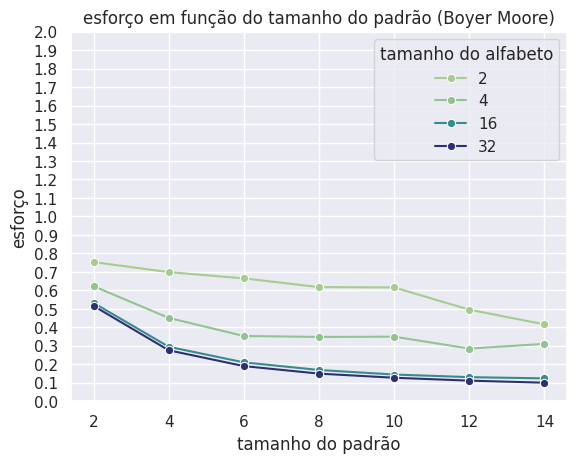

In [5]:
line_plot(data[data["algoritmo"]=="BM"], x="tamanho do padrão", y="esforço", color="tamanho do alfabeto", y_range=[0, 2],y_tick_interval=0.1, title_sufix="(Boyer Moore)")

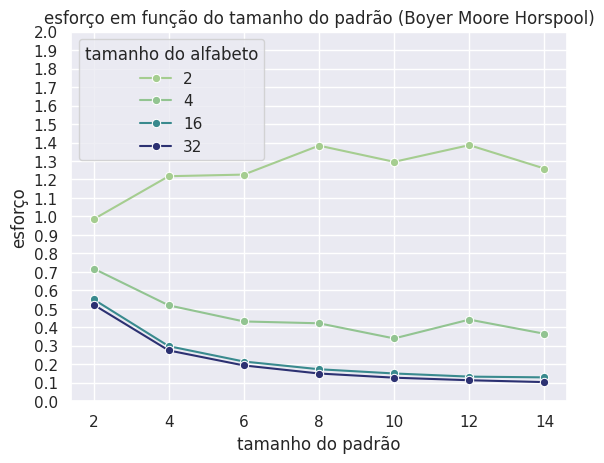

In [6]:
line_plot(data[data["algoritmo"]=="BMH"], x="tamanho do padrão", y="esforço", color="tamanho do alfabeto", y_range=[0, 2],y_tick_interval=0.1, title_sufix="(Boyer Moore Horspool)")

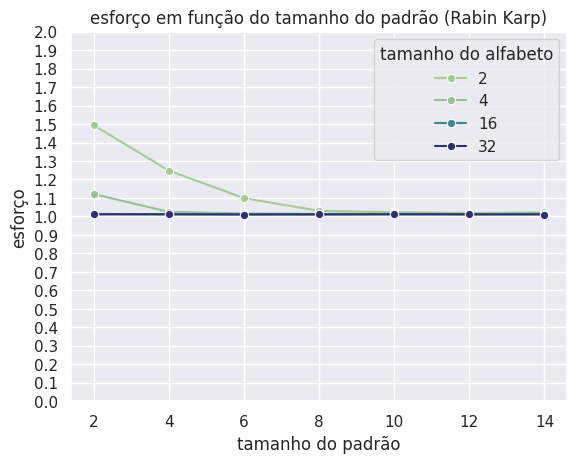

In [7]:
line_plot(data[data["algoritmo"]=="RK"], x="tamanho do padrão", y="esforço", color="tamanho do alfabeto", y_range=[0, 2],y_tick_interval=0.1, title_sufix="(Rabin Karp)")

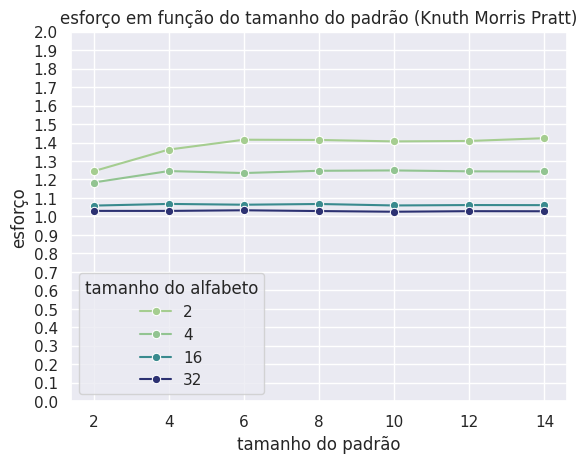

In [8]:
line_plot(data[data["algoritmo"]=="KMP"], x="tamanho do padrão", y="esforço", color="tamanho do alfabeto", y_range=[0, 2],y_tick_interval=0.1, title_sufix="(Knuth Morris Pratt)")